<a href="https://colab.research.google.com/github/cbmoliveira/TCC/blob/main/Dados_de_Chuva_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Etapa 1 : Importação das Bibliotecas

In [ ]:
#import os
import datetime
#import IPython
#import IPython.display
#import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import Normalizer
from scipy.signal import savgol_filter
#import seaborn as sns
#import tensorflow as tf
#from statsmodels.tsa.seasonal import seasonal_decompose

## Etapa 2: Carregamento da base de dados

2.2: Base de dados 1

In [ ]:
g1 = pd.read_csv("/content/drive/MyDrive/tcc/dados_82893_H_2000-01-01_2020-12-31.csv", sep=';', 
                 index_col='Data Medicao',
                 date_parser=(lambda t:pd.to_datetime(str(t),format='%d/%m/%Y', dayfirst = True)), 
                 usecols=['Data Medicao', 'PRECIPITACAO TOTAL, HORARIO(mm)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)', 'UMIDADE RELATIVA DO AR, HORARIA(%)', 'VENTO, VELOCIDADE HORARIA(m/s)'], 
                 header=0)
display(g1)

,"PRECIPITACAO TOTAL, HORARIO(mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, VELOCIDADE HORARIA(m/s)"
Data Medicao,,,,
2000-01-01,0.0,19.8,86.0,2.1
2000-01-01,0.0,24.0,63.0,7.5
2000-01-01,0.0,27.2,50.0,3.6
2000-01-02,0.0,19.4,91.0,3.1
2000-01-02,0.0,24.0,63.0,2.5
...,...,...,...,...
2020-12-30,NaN,NaN,NaN,NaN
2020-12-30,NaN,NaN,NaN,NaN
2020-12-31,NaN,NaN,NaN,NaN


2.3 Base de Dados 2

In [ ]:
g2 = pd.read_csv("/content/drive/MyDrive/tcc/dados_A322_H_2007-07-07_2020-12-31.csv", sep=';', 
                 index_col='Data Medicao',
                 date_parser=(lambda t:pd.to_datetime(str(t),format='%d/%m/%Y', dayfirst = True)), 
                 usecols=['Data Medicao', 'PRECIPITACAO TOTAL, HORARIO(mm)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)', 'UMIDADE RELATIVA DO AR, HORARIA(%)', 'VENTO, VELOCIDADE HORARIA(m/s)'], 
                 header=0)
display(g2)

,"PRECIPITACAO TOTAL, HORARIO(mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, VELOCIDADE HORARIA(m/s)"
Data Medicao,,,,
2007-07-07,NaN,NaN,NaN,NaN
2007-07-07,NaN,NaN,NaN,NaN
2007-07-07,NaN,NaN,NaN,NaN
2007-07-07,NaN,NaN,NaN,NaN
2007-07-07,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-12-31,0.0,23.0,80.0,2.9
2020-12-31,0.0,22.1,85.0,2.0
2020-12-31,0.0,21.3,89.0,1.9


In [ ]:
g1g = g1.groupby(['Data Medicao']).mean()
g2g = g2.groupby(['Data Medicao']).mean()
display(g1g,g2g)

,"PRECIPITACAO TOTAL, HORARIO(mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, VELOCIDADE HORARIA(m/s)"
Data Medicao,,,,
2000-01-01,0.0,23.666667,66.333333,4.400000
2000-01-02,0.0,23.466667,69.333333,2.966667
2000-01-03,0.0,22.300000,80.000000,2.566667
2000-01-04,3.3,NaN,NaN,3.366667
2000-01-05,2.0,NaN,NaN,2.633333
...,...,...,...,...
2020-12-27,NaN,NaN,NaN,NaN
2020-12-28,NaN,NaN,NaN,NaN
2020-12-29,NaN,NaN,NaN,NaN


,"PRECIPITACAO TOTAL, HORARIO(mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, VELOCIDADE HORARIA(m/s)"
Data Medicao,,,,
2007-07-07,NaN,NaN,NaN,NaN
2007-07-08,NaN,NaN,NaN,NaN
2007-07-09,0.241667,18.454167,94.791667,2.629167
2007-07-10,0.325000,18.725000,94.458333,2.945833
2007-07-11,0.158333,18.995833,80.458333,2.833333
...,...,...,...,...
2020-12-27,0.025000,20.804167,84.000000,4.245833
2020-12-28,0.008333,21.383333,79.291667,2.933333
2020-12-29,0.008333,21.591667,75.000000,1.933333


3.8 Juntar as duas tabelas

In [ ]:
g3 = g1g.combine_first(g2g)
display(g3)

,"PRECIPITACAO TOTAL, HORARIO(mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, VELOCIDADE HORARIA(m/s)"
Data Medicao,,,,
2000-01-01,0.000000,23.666667,66.333333,4.400000
2000-01-02,0.000000,23.466667,69.333333,2.966667
2000-01-03,0.000000,22.300000,80.000000,2.566667
2000-01-04,3.300000,NaN,NaN,3.366667
2000-01-05,2.000000,NaN,NaN,2.633333
...,...,...,...,...
2020-12-27,0.025000,20.804167,84.000000,4.245833
2020-12-28,0.008333,21.383333,79.291667,2.933333
2020-12-29,0.008333,21.591667,75.000000,1.933333


In [ ]:
g3i = g3.interpolate(method='time')

display(g3i)

,"PRECIPITACAO TOTAL, HORARIO(mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, VELOCIDADE HORARIA(m/s)"
Data Medicao,,,,
2000-01-01,0.000000,23.666667,66.333333,4.400000
2000-01-02,0.000000,23.466667,69.333333,2.966667
2000-01-03,0.000000,22.300000,80.000000,2.566667
2000-01-04,3.300000,22.575000,82.062500,3.366667
2000-01-05,2.000000,22.850000,84.125000,2.633333
...,...,...,...,...
2020-12-27,0.025000,20.804167,84.000000,4.245833
2020-12-28,0.008333,21.383333,79.291667,2.933333
2020-12-29,0.008333,21.591667,75.000000,1.933333


3.4 Informações sobre NAN nas duas séries

In [ ]:
g3i.isna().sum().sort_values(ascending=False)/len(g3i)


PRECIPITACAO TOTAL, HORARIO(mm)                0.0
TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)    0.0
UMIDADE RELATIVA DO AR, HORARIA(%)             0.0
VENTO, VELOCIDADE HORARIA(m/s)                 0.0
dtype: float64

## Etapa 3: Exploração da série temporal

3.3 Selecionar os anos a serem trabalhados

In [ ]:
datas = g3i['2000-01-01':'2015-12-31']

display(datas)

,"PRECIPITACAO TOTAL, HORARIO(mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, VELOCIDADE HORARIA(m/s)"
Data Medicao,,,,
2000-01-01,0.0,23.666667,66.333333,4.400000
2000-01-02,0.0,23.466667,69.333333,2.966667
2000-01-03,0.0,22.300000,80.000000,2.566667
2000-01-04,3.3,22.575000,82.062500,3.366667
2000-01-05,2.0,22.850000,84.125000,2.633333
...,...,...,...,...
2015-12-27,0.0,24.400000,70.000000,3.850000
2015-12-28,0.2,25.600000,73.500000,2.000000
2015-12-29,0.0,23.400000,83.500000,1.400000


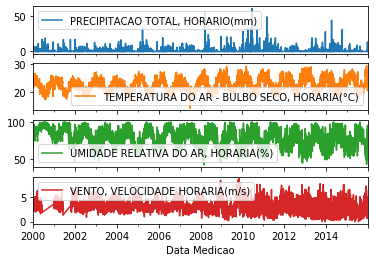

In [ ]:
axes = datas.plot.line(subplots=True)


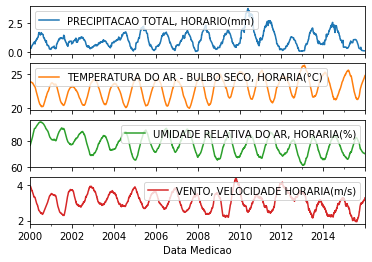

In [ ]:
axes2=datas.transform(lambda x: savgol_filter(x, 141,1, mode='nearest'))
axes3 = axes2.plot(subplots=True)


In [ ]:
datas.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
"PRECIPITACAO TOTAL, HORARIO(mm)",5844.0,1.073759,2.950753,0.000000,0.000000,0.000000,0.900000,61.0
"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",5844.0,22.873103,2.365533,14.133333,21.000000,22.933333,24.666667,29.6
"UMIDADE RELATIVA DO AR, HORARIA(%)",5844.0,77.723539,11.845114,42.000000,68.666667,78.000000,87.000000,100.0
"VENTO, VELOCIDADE HORARIA(m/s)",5844.0,3.059243,1.208952,0.000000,2.300000,2.966667,3.766667,8.6


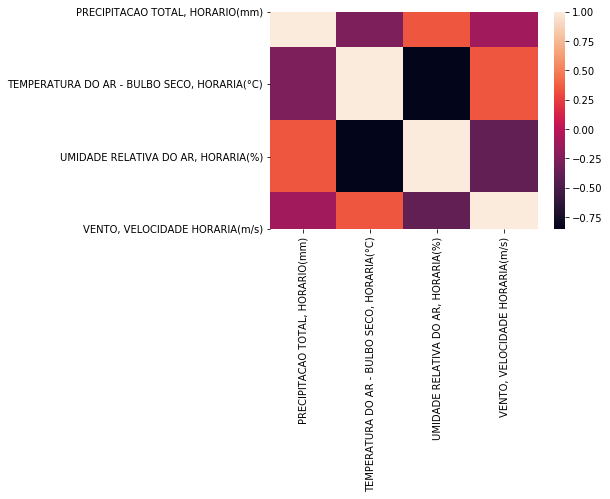

In [ ]:
#Correlação
import seaborn as sns
corMa=datas.corr()
sns.heatmap(corMa) #annot=True, mostra os valores das correlações
plt.show()

In [ ]:
#Previsores, feature
dprev = datas.iloc[:,2:5].values
display(dprev)

array([[66.33333333,  4.4       ],
       [69.33333333,  2.96666667],
       [80.        ,  2.56666667],
       ...,
       [83.5       ,  1.4       ],
       [73.        ,  3.7       ],
       [74.5       ,  2.9       ]])

In [ ]:
#Classe, target
dclass = datas.iloc[:, 1].values
display(dclass)

array([23.66666667, 23.46666667, 22.3       , ..., 23.4       ,
       24.3       , 24.6       ])

In [ ]:
dnorm = Normalizer().fit_transform(datas)
display(dnorm)

array([[0.        , 0.33538269, 0.94001626, 0.06235284],
       [0.        , 0.32033318, 0.94643894, 0.04049667],
       [0.        , 0.26838505, 0.96281631, 0.03089036],
       ...,
       [0.        , 0.26980863, 0.96277865, 0.0161424 ],
       [0.        , 0.31547323, 0.94771793, 0.04803502],
       [0.        , 0.31333588, 0.94892371, 0.03693797]])

In [ ]:
#train test
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(dprev, dclass, test_size=0.25, random_state=42)

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(4383, 2)
(1461, 2)
(4383,)
(1461,)


In [ ]:
#Baseline Mean absolute error
from sklearn.metrics import mean_absolute_error
y_pred = [y_train.mean()]*len(y_train)

print('Baseline MAE:', round(mean_absolute_error(y_train, y_pred),5))

Baseline MAE: 1.97482


In [ ]:
#Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lm = make_pipeline(
    StandardScaler(),
    LinearRegression(),
)

lm.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
#random forest
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor

forestModel = make_pipeline(
    SelectKBest(k='all'),
    StandardScaler(),
    RandomForestRegressor(
        n_estimators=100,
        max_depth=50,
        random_state=77,
        n_jobs=-1
    )
)

forestModel.fit(x_train, y_train)

Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, n_jobs=-1,
                                       random_state=77))])

In [ ]:
#Predictions on the Test Set, Linear Regression
print('Linear Regression Training MAE:', round (mean_absolute_error(y_train, lm.predict(x_train)), 5))
print('Linear Regression Test MAE:', round (mean_absolute_error(y_val, lm.predict(x_val)), 5))

Linear Regression Training MAE: 0.99457
Linear Regression Test MAE: 1.00246


In [ ]:
#Predictions on the Test Set, Random Forest
print('Random Forest Regressor Model Training MAE:', round (mean_absolute_error(y_train, forestModel.predict(x_train))))
print('Random Forest Regressor Model Validation MAE:', round (mean_absolute_error(y_val, forestModel.predict(x_val))))

Random Forest Regressor Model Training MAE: 0
Random Forest Regressor Model Validation MAE: 1


In [ ]:
#Accuracy - Performance Metrics - Linear Regression
y_predl= lm.predict(x_val)
errors = abs(y_predl - y_val)
#Calcular a média absoluta da percentagem de erro (mean absolute percentagem error (MAPE))
a=100
c=errors[:,None]
d=y_train
b=c/d
mape= b * a
#Calcular e mostrar a acurácia
accuracy= 100 - np.mean(mape)
print('Linear Regression Model Prediction Accuracy:', round(accuracy, 2), '%.')

Linear Regression Model Prediction Accuracy: 95.57 %.


In [ ]:
#Accuracy - Performance Metrics Random Forest
errors = np.abs(y_predl - y_val)
#Calcular a média absoluta da percentagem de erro (mean absolute percentagem error (MAPE))
a=100
c=errors[:,None]
d=y_train
b=c/d
maper= a*b
#Calcular e mostrar a acurácia
accuracyr= 100 - np.mean(maper)
print('Random Forest Regressor Model Prediction Accuracy:', round(accuracyr, 2), '%.')

Random Forest Regressor Model Prediction Accuracy: 95.57 %.


In [ ]:
!pip install pdpbox

In [ ]:
#entender melhor as variaveis

from pdpbox.pdp import pdp_isolate, pdp_plot

feature = datas['PRECIPITACAO TOTAL, HORARIO(mm)']

isolated = pdp_isolate(
    model=forestModel,
    dataset=x_val,
    model_features=.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature)

AttributeError: ignored